# Create b_bottom from HMI data

In [ ]:
#| default_exp prepare_hmi

In [ ]:
from setproctitle import setproctitle
setproctitle("HMI")

In [ ]:
#| export
import os
import glob
import numpy as np
from sunpy.map import Map
import matplotlib.pyplot as plt
from astropy import units as u

In [ ]:
#| export
class PrepareHMI:
    def __init__(self, base_path, hmi_path):
        self.base_path = base_path
        os.makedirs(self.base_path, exist_ok=True)
        self.hmi_path = hmi_path
    
    def load_hmi_data(self):
        hmi_p_files = sorted(glob.glob(os.path.join(self.hmi_path, '*Bp.fits'))) 
        hmi_t_files = sorted(glob.glob(os.path.join(self.hmi_path, '*Bt.fits')))  
        hmi_r_files = sorted(glob.glob(os.path.join(self.hmi_path, '*Br.fits')))  

        self.data_paths = list(zip(hmi_p_files, hmi_t_files, hmi_r_files))
        return self.data_paths

    def plot_hmi(self, idx):
        hmi_p, hmi_t, hmi_r = self.data_paths[idx]
        p_map = Map(hmi_p)
        t_map = Map(hmi_t)
        r_map = Map(hmi_r)
        p_map.peek()
        t_map.peek()
        r_map.peek()

    def meta_hmi(self, idx):
        hmi_p, hmi_t, hmi_r = self.data_paths[idx]
        p_map = Map(hmi_p)
        t_map = Map(hmi_t)
        r_map = Map(hmi_r)
        print("========Bp========")
        print(p_map.meta)
        print("==================")
        print()

        print("========Bt========")
        print(t_map.meta)
        print("==================")
        print()

        print("========Br========")
        print(r_map.meta)
        print("==================")
            
    def plot_bottom(self, idx, stride=2):
        hmi_p, hmi_t, hmi_r = self.data_paths[idx]
        p_map = Map(hmi_p)
        t_map = Map(hmi_t)
        r_map = Map(hmi_r)

        maps = [p_map, t_map, r_map]
        B_hmi = np.stack([maps[0].data, -maps[1].data, maps[2].data]).transpose()

        plt.close()
        fig, ax = plt.subplots(figsize=(6,6))
        CS = plt.imshow(B_hmi[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(r"$B_z$(z=0)" +f" | {B_hmi.shape}")
        fig.colorbar(CS)
        plt.show()

        maps_binned = [m.superpixel(u.Quantity((stride, stride), u.pixel), func=np.mean) for m in maps]
        B_binned = np.stack([maps_binned[0].data, -maps_binned[1].data, maps_binned[2].data]).transpose()
        
        plt.close()
        fig, ax = plt.subplots(figsize=(6,6))
        CS = plt.imshow(B_binned[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(r"$B_z$(z=0)" +f" | {B_binned.shape}")
        fig.colorbar(CS)
        plt.show()

    def save_bottom(self, stride=2):
        for hmi_p, hmi_t, hmi_r in self.data_paths:
            obs_date = os.path.basename(hmi_p)[-27:-12]
            b_bottom_path = os.path.join(self.base_path, f'b_bottom_{obs_date}.npy')
            if os.path.exists(b_bottom_path):
                print(f'Exist {b_bottom_path}')
                continue

            p_map = Map(hmi_p)
            t_map = Map(hmi_t)
            r_map = Map(hmi_r)

            maps = [p_map, t_map, r_map]
            maps_binned = [m.superpixel(u.Quantity((stride, stride), u.pixel), func=np.mean) for m in maps]
            B_binned = np.stack([maps_binned[0].data, -maps_binned[1].data, maps_binned[2].data]).transpose()

            b_bottom = np.array(B_binned)

            with open(b_bottom_path, 'wb') as f:
                np.save(f, b_bottom)
            print(f"Saved {b_bottom_path}")

In [ ]:
base_path = os.path.expanduser('~/workspace/_data/NOAA12673/b_bottom/')
hmi_path = '/nas/obsdata/sdo_AR/NOAA12673/hmi/'

In [ ]:
creater = PrepareHMI(base_path, hmi_path)

In [ ]:
creater.load_hmi_data()

[('/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bp.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bt.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_000000_TAI.Br.fits'),
 ('/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_001200_TAI.Bp.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_001200_TAI.Bt.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_001200_TAI.Br.fits'),
 ('/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_002400_TAI.Bp.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_002400_TAI.Bt.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_002400_TAI.Br.fits'),
 ('/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_003600_TAI.Bp.fits',
  '/nas/obsdata/sdo_AR/NOAA12673/hmi/hmi.sharp_cea_720s.7115.20170904_003600_TAI.Bt.fit

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


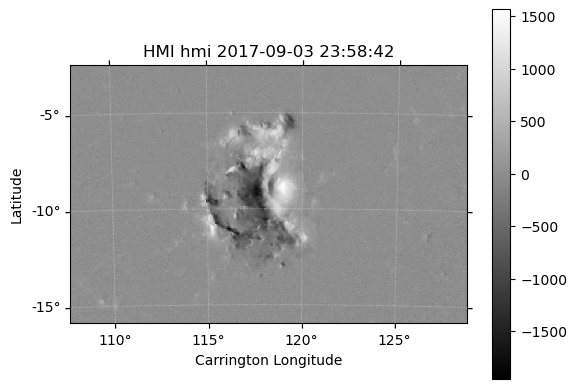

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


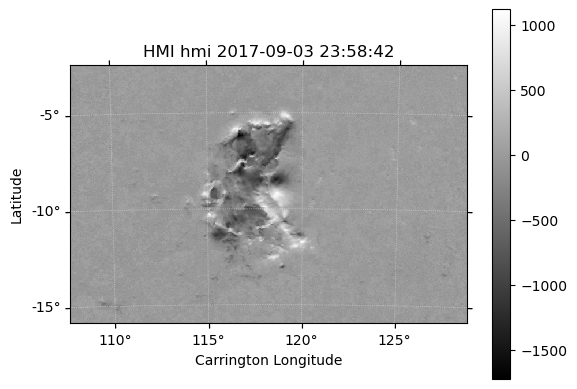

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


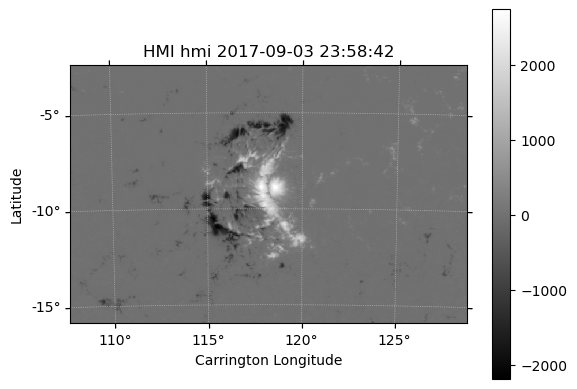

In [ ]:
creater.plot_hmi(0)

In [ ]:
creater.meta_hmi(0)

========Bp========
simple: True
bitpix: 32
naxis: 2
naxis1: 688
naxis2: 448
blank: -2147483648
bzero: 0.0
bscale: 0.01
checksum: 2Ln32Kk12Kk12Kk1
datasum: 3668690723
date: 2017-10-09T03:04:53.000
date_s: 2017-09-08T17:19:08.000
date_b: 2017-09-10T08:49:19.000
date-obs: 2017-09-03T23:58:42.200
t_obs: 2017.09.04_00:00:04.203_TAI
t_rec: 2017.09.04_00:00:00.000_TAI
trecepoc: 1993.01.01_00:00:00.000_TAI
trecstep: 720.0
trecunit: secs
cadence: 720.0
usflux: 2.33095666e+22
meangam: 60.9712143
meangbt: 108.533112
meangbz: 122.083214
meangbh: 81.9712906
meanjzd: -0.176174253
totusjz: 56044520700000.0
meanalp: -0.0666425973
meanjzh: -0.0351469964
totusjh: 3211.80591
absnjzh: 1280.44019
savncpp: 53733652200000.0
meanpot: 17168.6914
totpot: 8.30700913e+23
meanshr: 51.6004753
shrgt45: 57.4177246
r_value: 4.91179323
gwill: None
ctype1: CRLN-CEA
ctype2: CRLT-CEA
crpix1: 344.5
crpix2: 224.5
crval1: 118.228928
crval2: -9.24354935
cdelt1: 0.0299999993
cdelt2: 0.0299999993
cunit1: degree
cunit2: degree
i

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


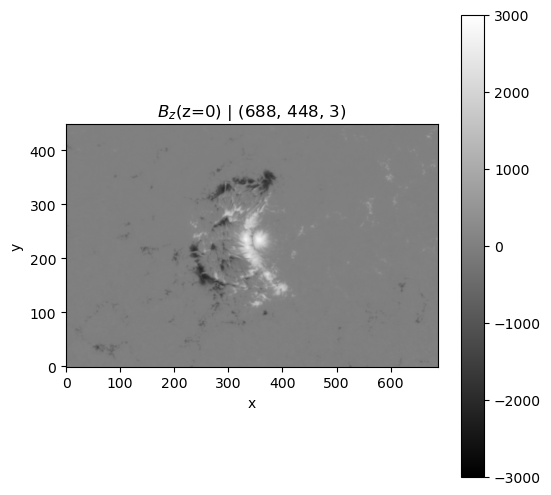

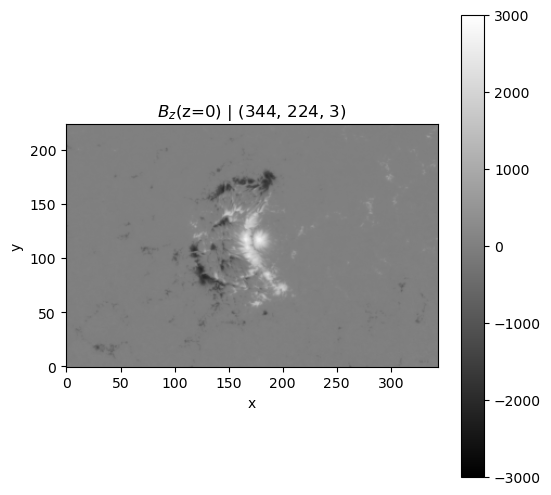

In [ ]:
creater.plot_bottom(0, stride=2)

In [ ]:
creater.save_bottom()

Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_000000.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_001200.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_002400.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_003600.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_004800.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_010000.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_011200.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_012400.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_013600.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_014800.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_020000.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom_20170904_021200.npy
Saved /userhome/jeon_mg/workspace/_data/NOAA12673/b_